In [ ]:
import pandas as pd
import numpy as np
import statsmodels
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
life_expectancy = pd.read_csv("all_data.csv")
print(life_expectancy.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [ ]:
#print(life_expectancy["Country"].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [ ]:
low_income_nations = ["Chile", "Zimbabwe"]
life_expectancy['Category'] = life_expectancy.Country.apply(lambda X: "Low_income_countries" if X in low_income_nations else "High_income_nations")
life_expectancy.describe(include = 'all')

,Country,Year,Life expectancy at birth (years),GDP,Category
count,96,96.000000,96.000000,9.600000e+01,96
unique,6,NaN,NaN,NaN,2
top,Chile,NaN,NaN,NaN,High_income_nations
freq,16,NaN,NaN,NaN,64
mean,NaN,2007.500000,72.789583,3.880499e+12,NaN
std,NaN,4.633971,10.672882,5.197561e+12,NaN
min,NaN,2000.000000,44.300000,4.415703e+09,NaN
25%,NaN,2003.750000,74.475000,1.733018e+11,NaN
50%,NaN,2007.500000,76.750000,1.280220e+12,NaN
75%,NaN,2011.250000,78.900000,4.067510e+12,NaN


In [ ]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


                           Country           GDP
0                     GDP of Chile  1.697888e+11
1                     GDP of China  4.957714e+12
2                   GDP of Germany  3.094776e+12
3                    GDP of Mexico  9.766506e+11
4  GDP of United States of America  1.407500e+13
5                  GDP of Zimbabwe  9.062580e+09


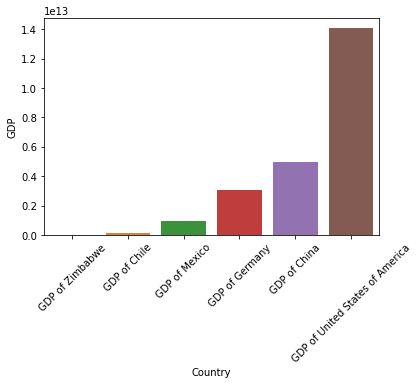

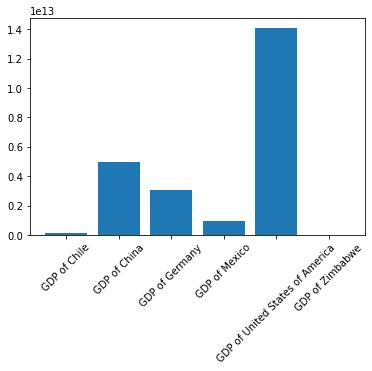

In [ ]:
Country_list = life_expectancy["Country"].unique()

#New_list = np.mean(life_expectancy.GDP[life_expectancy.Country == "Chile"])
#print(New_list)  
New_list_labels = []
for item in Country_list:
    operation = "GDP of " + item
    New_list_labels.append(operation)
    
#print(New_list_labels)  
New_list_labels_vales = []
for item in Country_list:
    New_list_labels_vales.append(np.mean(life_expectancy.GDP[life_expectancy.Country == item]))


df = pd.DataFrame(zip(New_list_labels, New_list_labels_vales))    
df.columns = ['Country', "GDP"]
df.sort_values("GDP")
print(df)
 
sns.barplot(x='Country',
            y="GDP", data=df,
            order=df.sort_values('GDP').Country)
plt.xticks(rotation=45)
plt.show()
plt.close()
ax = plt.subplot()   
plt.bar(range(len(New_list_labels)), New_list_labels_vales, )
plt.xticks(range(6))
plt.xticks(rotation=45)
ax.set_xticklabels(New_list_labels)
plt.show()

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy at birth (years)'>

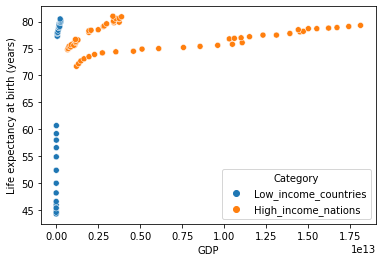

In [ ]:
sns.scatterplot(data = life_expectancy, y = 'Life expectancy at birth (years)', x = 'GDP', hue = 'Category' )

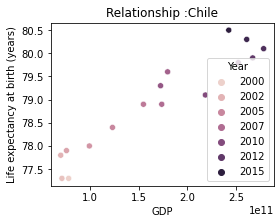

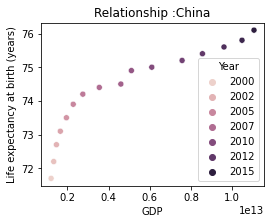

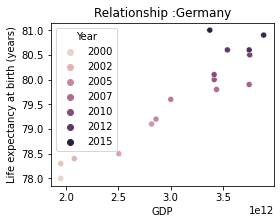

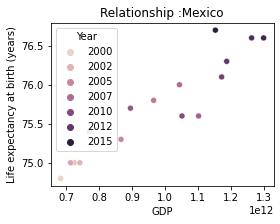

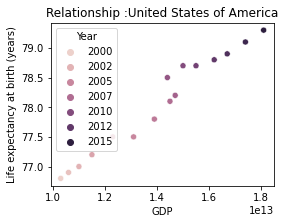

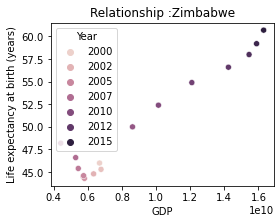

In [ ]:
for item in Country_list:
    plt.figure(figsize = (4, 3))
    new_df = life_expectancy[life_expectancy.Country == item]
    sns.scatterplot(data = new_df, y = 'Life expectancy at birth (years)', x = 'GDP', color = 'Green', marker = 'o', hue = "Year" )
    plt.title("Relationship :" + item)
    plt.show()
    plt.close()

In [ ]:
### What's found from the analysis is that for counter where the GDP is already above + 11  
#the increase in the average life expectenecy is very less as compared to the Countries where the GDP is lower than the e+10 .
#espcially in the case of Zimbabwe the life+expectenacy grew by 15 years which is 3 times as compared to inreses in developed nations
